In [23]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.utils import resample
import matplotlib.pyplot as plt
# Define a function to create the pipeline and fit the data

def fit_svr_with_bootstrap(X, y, SD):
    # Create a pipeline to normalize the data and fit the SVR model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
    
    # Bootstrap 1000 models
    predictions = []
    for _ in range(1000):
        # Resample the data
        X_resampled, y_resampled = resample(X, y)
        
        # Fit the model
        pipeline.fit(X_resampled, y_resampled)
        
        # Predict on the original data
        y_pred = pipeline.predict(X)
        predictions.append(y_pred)
    median_pred = np.median(predictions, axis=0)
    redisuals = y - median_pred
    std_dev = np.std(redisuals)
    # Calculate the 95% confidence interval for all predictions
    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)

    lower_bound = lower_bound - SD*std_dev
    upper_bound = upper_bound + SD*std_dev
   
    
    return lower_bound, upper_bound, median_pred


100 100 100


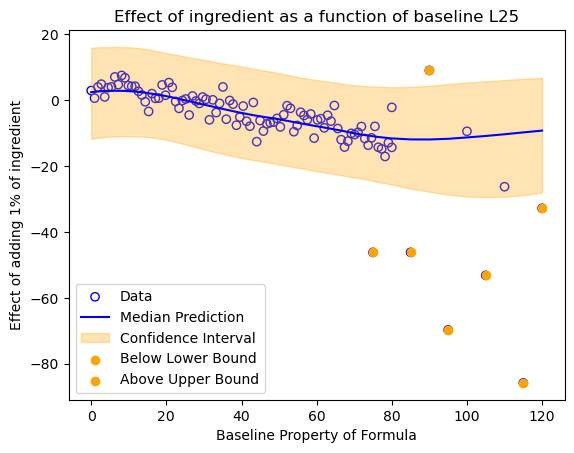

101 101 101


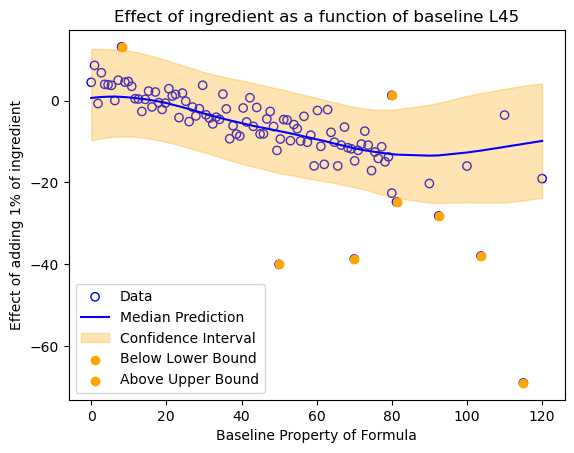

101 101 101


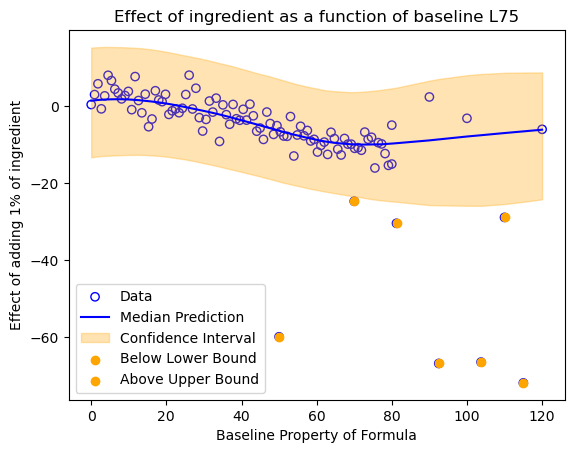

In [32]:
# Import the files L25, L45, L75
angles = ['L25', 'L45', 'L75'
              ]

for angle in angles:
    data_frames = []
    data_frames.append(pd.read_csv(f'{angle}.csv'))

# Iterate over the data frames and perform the required steps
    for i, df in enumerate(data_frames):
        X = df[['x']]  # Replace 'feature1' and 'feature2' with the actual column names
        y = df['y']  # Replace 'target' with the actual target column name
        
        # Fit SVR with bootstrap and get the confidence interval
        lower_bound, upper_bound, median_pred = fit_svr_with_bootstrap(X, y,1)
    #saving the data and sorting
        sorted_data = sorted(zip(X.squeeze(), median_pred), key=lambda x: x[0])
        sorted_X, sorted_median_pred = zip(*sorted_data)
        sorted_df = pd.DataFrame({'x': sorted_X, 'median_predict': sorted_median_pred})
        sorted_df.to_csv(f'{angle}_pred.csv', index=False)

        sorted_boundry = sorted(zip(X.squeeze(), lower_bound, upper_bound), key=lambda x: x[0])
        sorted_X, sorted_lower_bound, sorted_upper_bound = zip(*sorted_boundry)
        print(len(sorted_X), len(sorted_lower_bound), len(sorted_upper_bound))
        sorted_boundry_df = pd.DataFrame({'x': sorted_X, 'lower_bound': sorted_lower_bound, 'upper_bound': sorted_upper_bound})
        sorted_boundry_df.to_csv(f'{angle}_boundry.csv', index=False)
    #plotting the data
        plt.scatter(X, y, facecolors='none', edgecolors='blue', label='Data')
        plt.plot(sorted_X, sorted_median_pred, color='blue', label='Median Prediction')
        plt.fill_between(sorted_X, sorted_lower_bound, sorted_upper_bound, color='orange', alpha=0.3, label='Confidence Interval')

        # Plot points below the lower bound
        below_lower_bound = y < lower_bound
        plt.scatter(X[below_lower_bound], y[below_lower_bound], color='orange', label='Below Lower Bound')

        # Plot points above the upper bound
        above_upper_bound = y > upper_bound
        plt.scatter(X[above_upper_bound], y[above_upper_bound], color='orange', label='Above Upper Bound')

        plt.xlabel('Baseline Property of Formula')
        plt.ylabel('Effect of adding 1% of ingredient')
        plt.title(f'Effect of ingredient as a function of baseline {angle}')
        plt.legend()
        plt.show()


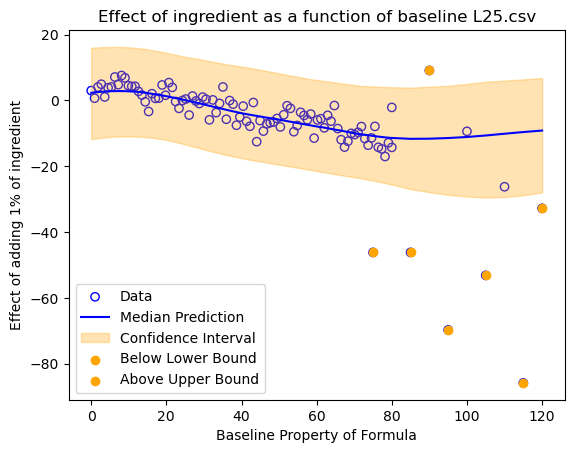

In [27]:
plt.scatter(X, y, facecolors='none', edgecolors='blue', label='Data')
plt.plot(sorted_X, sorted_median_pred, color='blue', label='Median Prediction')
plt.fill_between(sorted_X, sorted_lower_bound, sorted_upper_bound, color='orange', alpha=0.3, label='Confidence Interval')

# Plot points below the lower bound
below_lower_bound = y < lower_bound
plt.scatter(X[below_lower_bound], y[below_lower_bound], color='orange', label='Below Lower Bound')

# Plot points above the upper bound
above_upper_bound = y > upper_bound
plt.scatter(X[above_upper_bound], y[above_upper_bound], color='orange', label='Above Upper Bound')

plt.xlabel('Baseline Property of Formula')
plt.ylabel('Effect of adding 1% of ingredient')
plt.title(f'Effect of ingredient as a function of baseline {file_path}')
plt.legend()
plt.show()



In [20]:
# Import the files L25, L45, L75
file_paths = ['L25', 'L45', 'L75']
for file_path in file_paths:
    data_frame = pd.read_csv(f'{file_path}.csv')  # Replace 'file_path' with the actual file path

    # Iterate over the data frames and perform the required steps
    X = data_frame['x'].values  # Replace 'x' with the actual column name
    y = data_frame['y'].values  # Replace 'y' with the actual target column name

    # Debug statements to check the shapes
    print(f"Shape of X for {file_path}: {X.shape}")
    print(f"Shape of y for {file_path}: {y.shape}")

    # Fit SVR with bootstrap and get the confidence interval
    lower_bound, upper_bound, median_pred = fit_svr_with_bootstrap(X, y, 1)

    sorted_data = sorted(zip(X.squeeze(), median_pred), key=lambda x: x[0])
    sorted_X, sorted_median_pred = zip(*sorted_data)
    with open(f'{file_path}_pred.csv', 'w') as f:
        f.write('x,median_predict\n')
        for x, y in sorted_data:
            f.write(f'{x},{y}\n')

    sorted_boundry = sorted(zip(X.squeeze(), lower_bound, upper_bound), key=lambda x: x[0])
    with open(f'{file_path}_boudry.csv', 'w') as f:
        f.write('x,lower_bound, upper_bound\n')
        for x, y, z in sorted_boundry:
            f.write(f'{x},{y},{z}\n')

    sorted_X, sorted_lower_bound, sorted_upper_bound = zip(*sorted_boundry)

    plt.scatter(X, y, facecolors='none', edgecolors='blue', label='Data')
    plt.plot(sorted_X, sorted_median_pred, color='blue', label='Median Prediction')
    plt.fill_between(sorted_X, sorted_lower_bound, sorted_upper_bound, color='orange', alpha=0.3, label='Confidence Interval')

    # Plot points below the lower bound
    below_lower_bound = y < lower_bound
    plt.scatter(X[below_lower_bound], y[below_lower_bound], color='orange', label='Below Lower Bound')

    # Plot points above the upper bound
    above_upper_bound = y > upper_bound
    plt.scatter(X[above_upper_bound], y[above_upper_bound], color='orange', label='Above Upper Bound')

    plt.xlabel('Baseline Property of Formula')
    plt.ylabel('Effect of adding 1% of ingredient')
    plt.title(f'Effect of ingredient as a function of baseline {file_path}')
    plt.legend()
    plt.show()


Shape of X for L25: (100,)
Shape of y for L25: (100,)


ValueError: Expected 2D array, got 1D array instead:
array=[  0.           0.8988764    1.79775281   2.69662921   3.59550562
   4.49438202   5.39325843   6.29213483   7.19101124   8.08988764
   8.98876404   9.88764045  10.78651685  11.68539326  12.58426966
  13.48314607  14.38202247  15.28089888  16.17977528  17.07865169
  17.97752809  18.87640449  19.7752809   20.6741573   21.57303371
  22.47191011  23.37078652  24.26966292  25.16853933  26.06741573
  26.96629213  27.86516854  28.76404494  29.66292135  30.56179775
  31.46067416  32.35955056  33.25842697  34.15730337  35.05617978
  35.95505618  36.85393258  37.75280899  38.65168539  39.5505618
  40.4494382   41.34831461  42.24719101  43.14606742  44.04494382
  44.94382022  45.84269663  46.74157303  47.64044944  48.53932584
  49.43820225  50.33707865  51.23595506  52.13483146  53.03370787
  53.93258427  54.83146067  55.73033708  56.62921348  57.52808989
  58.42696629  59.3258427   60.2247191   61.12359551  62.02247191
  62.92134831  63.82022472  64.71910112  65.61797753  66.51685393
  67.41573034  68.31460674  69.21348315  70.11235955  71.01123596
  71.91011236  72.80898876  73.70786517  74.60674157  75.50561798
  76.40449438  77.30337079  78.20224719  79.1011236   80.
  80.          90.         100.         110.         120.
  75.          85.          95.         105.         115.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

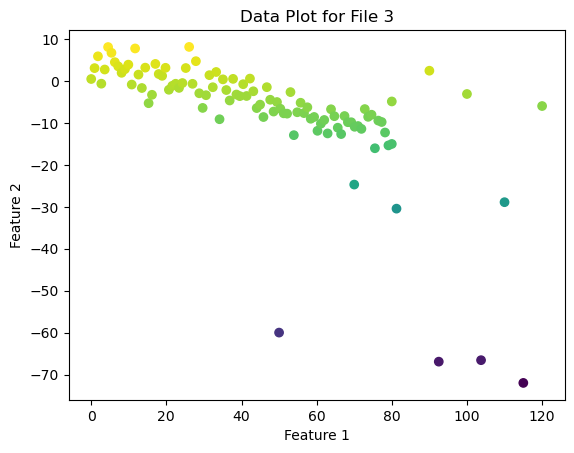

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
file_paths = ['L25.csv', 'L45.csv', 'L75.csv']
data_frames = []
for file_path in file_paths:
    data_frames.append(pd.read_csv(file_path))
for i, df in enumerate(data_frames):
    X = df[['x']]  # Replace 'feature1' and 'feature2' with the actual column names
    y = df['y']
plt.scatter(X, y, c=y, cmap='viridis')
#plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Data Plot for File {i+1}')
plt.show()